# **Introduction**

**COVID-19**


    The coronavirus outbreak came to light on December 31, 2019 when China informed the World Health Organisation of a cluster of cases of pneumonia of an unknown cause in Wuhan City in Hubei Province. Subsequently the disease spread to more Provinces in China, and to the rest of the world. The WHO declared it a pandemic. The virus has been named SARS-CoV-2 and the disease is now called COVID-19 (source : "The Hindu")

    In this Dataset, I've analysed data regarding the Covid19 pandemic downloaded from Kaggle. The Data used in this project is recorded as on 29 April 2020 (i,e during the initial phases of Covid in India and the World)

**The Things that I've analysed in this model are :**

    1. The Total number of Confirmed, Death and Recovered people from the dataset
    2. Top 10 countries with the most confirmed Cases
    3. Top 10 countires with the most deaths recorded
    4. Top 10 countries with the most recovery 
    5. USA's Status as of 29th April 2020 (visualising the distribution of confirmed cases in USA)


In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import os
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as mplt
%pip install squarify
import squarify

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
os.getcwd() #finding the current working directory in order to save the dataset in it

'/home/jovyan/binder'

In [6]:
#Reading the Dataset
covdata = pd.read_csv('/home/jovyan/binder/covid_19_data.csv')

In [7]:
covdata.head(20)

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
5,4/29/2020,NaN,Antigua and Barbuda,24,3,11
6,4/29/2020,NaN,Argentina,4285,214,1192
7,4/29/2020,NaN,Armenia,1932,30,900
8,4/29/2020,NaN,Austria,15402,580,12779
9,4/29/2020,NaN,Azerbaijan,1766,23,1267


**Data Exploring**

In [8]:
covdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


In [9]:
covdata.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [10]:
covdata.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

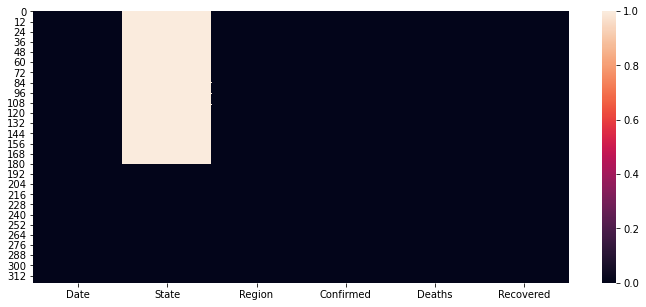

In [11]:
#Visualising the NULL Value
mplt.figure(figsize=(12,5)) 
sns.heatmap(covdata.isnull()) #to see the non non-values results in heatmap form
mplt.show()

**Data Cleaning**

In [12]:
#getting the unique value in State attribute.
covdata['State'].unique()

array([nan, 'Alabama', 'Alaska', 'Alberta', 'Anguilla', 'Anhui',
       'Arizona', 'Arkansas', 'Aruba', 'Australian Capital Territory',
       'Beijing', 'Bermuda', 'Bonaire, Sint Eustatius and Saba',
       'British Columbia', 'British Virgin Islands', 'California',
       'Cayman Islands', 'Channel Islands', 'Chongqing', 'Colorado',
       'Connecticut', 'Curacao', 'Delaware',
       'Diamond Princess cruise ship', 'District of Columbia',
       'Falkland Islands (Malvinas)', 'Faroe Islands', 'Florida',
       'French Guiana', 'French Polynesia', 'Fujian', 'Gansu', 'Georgia',
       'Gibraltar', 'Grand Princess', 'Greenland', 'Guadeloupe', 'Guam',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hawaii', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Idaho',
       'Illinois', 'Indiana', 'Inner Mongolia', 'Iowa', 'Isle of Man',
       'Jiangsu', 'Jiangxi', 'Jilin', 'Kansas', 'Kentucky', 'Liaoning',
       'Louisiana', 'Macau', 'Maine', 'Manitoba', 'Marti

We can see that there are no unicodic symbols in this database

In [13]:
#checking how many null values are their in `State` attribute
covdata[covdata['State'].isnull()]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
176,4/29/2020,NaN,West Bank and Gaza,344,2,71
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
179,4/29/2020,NaN,Zambia,97,3,54


In [14]:
#replacing NaN
covdata['State'].replace('NaN','Evaluation Pending',inplace=True)

In [15]:
covdata[covdata['State'].isnull()]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
176,4/29/2020,NaN,West Bank and Gaza,344,2,71
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
179,4/29/2020,NaN,Zambia,97,3,54


In [16]:
covdata.shape

(321, 6)

In [17]:
#checking wheathe all the null values are processed
covdata.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [18]:
covdata.dropna(inplace=True)

In [19]:
covdata.shape

(140, 6)

In [20]:
#checking wheathe all the null values are processed
covdata.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

Since the null values are reduced to zero, I'll be heading to answer the problem questions

**1**

In [21]:
#to show the total number of confirmed, deaths and recovered cases in each region 
#1. confirmed
covdata.groupby('Region')['Confirmed'].sum()

Region
Australia            6752
Canada              52865
Denmark               198
France               1450
Hong Kong            1037
Macau                  45
Mainland China      82862
Netherlands           196
UK                   1220
US                1039909
Name: Confirmed, dtype: int64

In [22]:
#2. deaths
covdata.groupby('Region')['Deaths'].sum()

Region
Australia            91
Canada             3155
Denmark               0
France               34
Hong Kong             4
Macau                 0
Mainland China     4633
Netherlands          16
UK                   69
US                60967
Name: Deaths, dtype: int64

In [23]:
#3. recovered
covdata.groupby('Region')['Recovered'].sum()

Region
Australia           5715
Canada             20327
Denmark              192
France               890
Hong Kong            830
Macau                 34
Mainland China     77610
Netherlands          119
UK                   857
US                120720
Name: Recovered, dtype: int64

**Data Visualisation**

**2.**

In [24]:
# creating new list to having the confirmed cases
topconfirmed=[]
for region in covdata['Region'].unique():
    df=covdata[covdata['Region']==region]    #get the dataframe for each region
    sum=np.sum(df['Confirmed'])         #total number of confirmed patients
    topconfirmed.append([region,sum])

region=pd.DataFrame(topconfirmed,columns=['Region','Confirmed'])  #converting the list to dataframe and sort
region.sort_values(by='Confirmed',ascending=False,inplace=True)

In [25]:
region

,Region,Confirmed
0,US,1039909
3,Mainland China,82862
1,Canada,52865
5,Australia,6752
7,France,1450
2,UK,1220
8,Hong Kong,1037
6,Denmark,198
4,Netherlands,196
9,Macau,45


In [26]:
covdata.shape

(140, 6)

In [27]:
#top 10 regions with the most confirmed cases
covdata.groupby('Region')['Confirmed'].sum().sort_values(ascending = False).head(10)

Region
US                1039909
Mainland China      82862
Canada              52865
Australia            6752
France               1450
UK                   1220
Hong Kong            1037
Denmark               198
Netherlands           196
Macau                  45
Name: Confirmed, dtype: int64

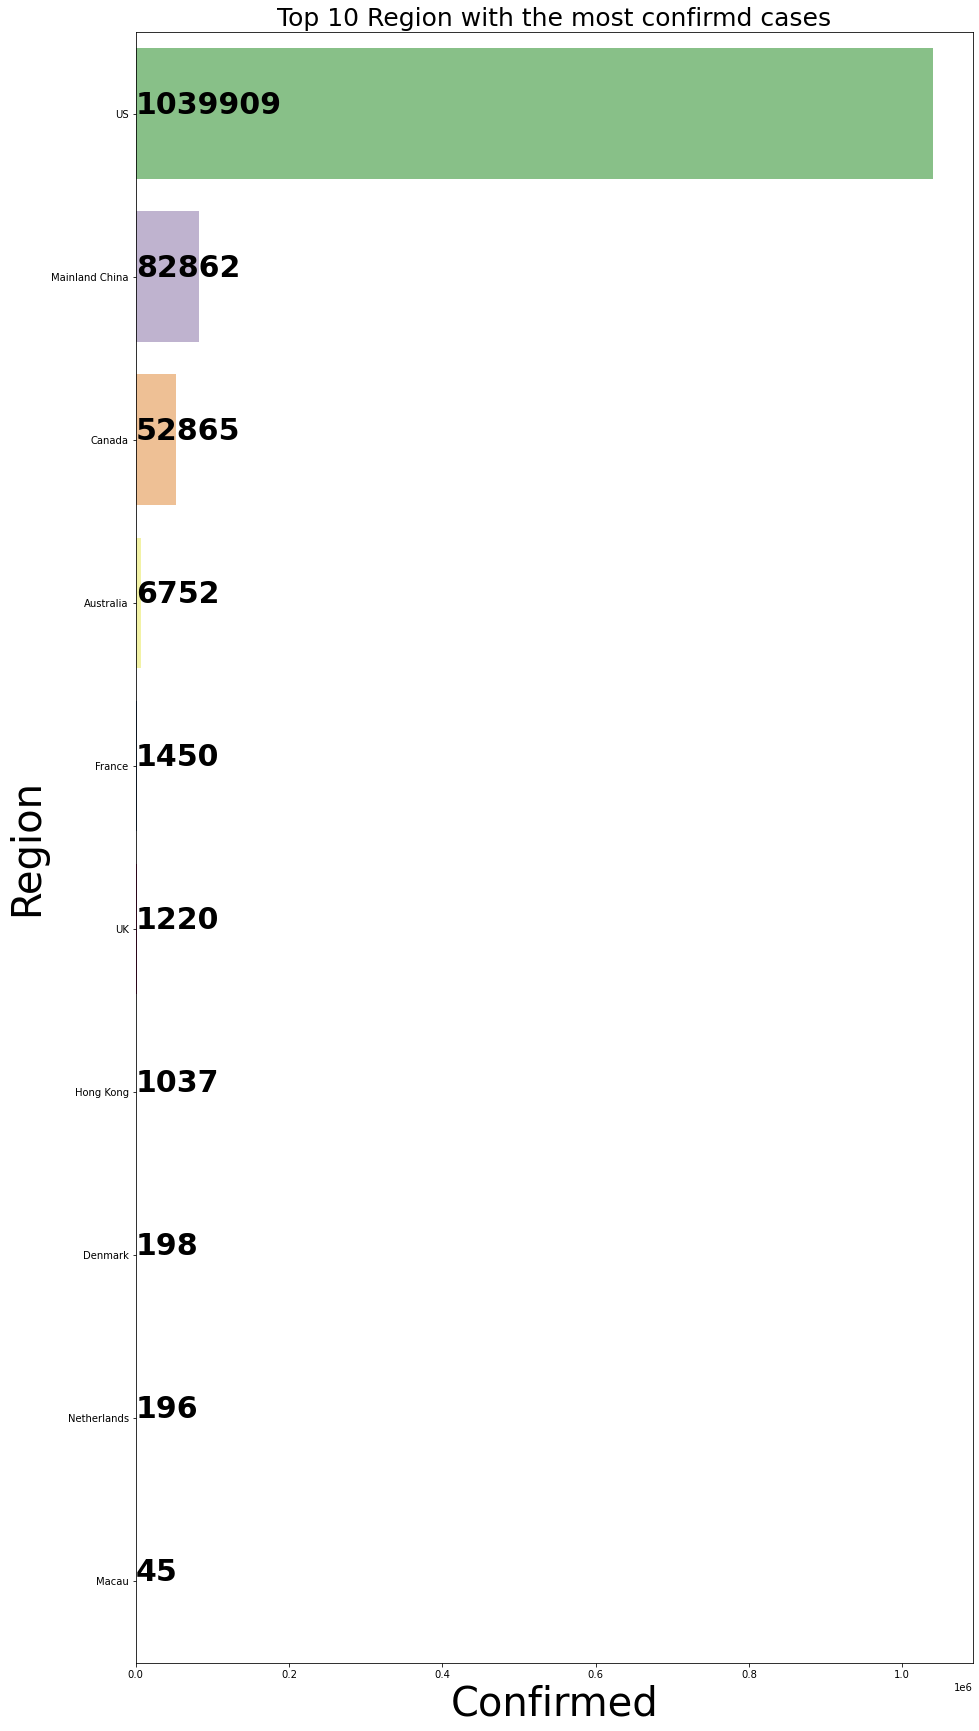

In [28]:
# visualising the top 10 region with the most confirmed cases
mplt.figure(figsize=(15,30))
ax = sns.barplot(x = "Confirmed",y = "Region", data = region, palette = "Accent", linewidth = 5, label = "big")
for i, j in enumerate(region["Confirmed"]):
    ax.text(65, i, j, weight = "bold", color = "black", fontsize = 30, ha = "left")
mplt.title("Top 10 Region with the most confirmd cases",fontsize=25)
ax.set_xlabel(xlabel = 'Confirmed', fontsize = 40)
ax.set_ylabel(ylabel = 'Region', fontsize = 40)
mplt.show()

**The Country with the most confirmed cases as of the database is USA.**

**3.**

In [29]:
#Top 10 regions with the most number of deaths
covdata.groupby('Region')['Deaths'].sum().sort_values(ascending = False).head(10)

Region
US                60967
Mainland China     4633
Canada             3155
Australia            91
UK                   69
France               34
Netherlands          16
Hong Kong             4
Macau                 0
Denmark               0
Name: Deaths, dtype: int64

In [30]:
# creating new list to having the dead cases
topdeath=[]
for region in covdata['Region'].unique():
    df=covdata[covdata['Region']==region]    #get the dataframe for each region
    sum=np.sum(df['Deaths'])         #total number of deaths occured
    topdeath.append([region,sum])

region=pd.DataFrame(topdeath,columns=['Region','Deaths'])  #converting the list to dataframe and sort
region.sort_values(by='Deaths',ascending=False,inplace=True)

In [31]:
region

,Region,Deaths
0,US,60967
3,Mainland China,4633
1,Canada,3155
5,Australia,91
2,UK,69
7,France,34
4,Netherlands,16
8,Hong Kong,4
6,Denmark,0
9,Macau,0


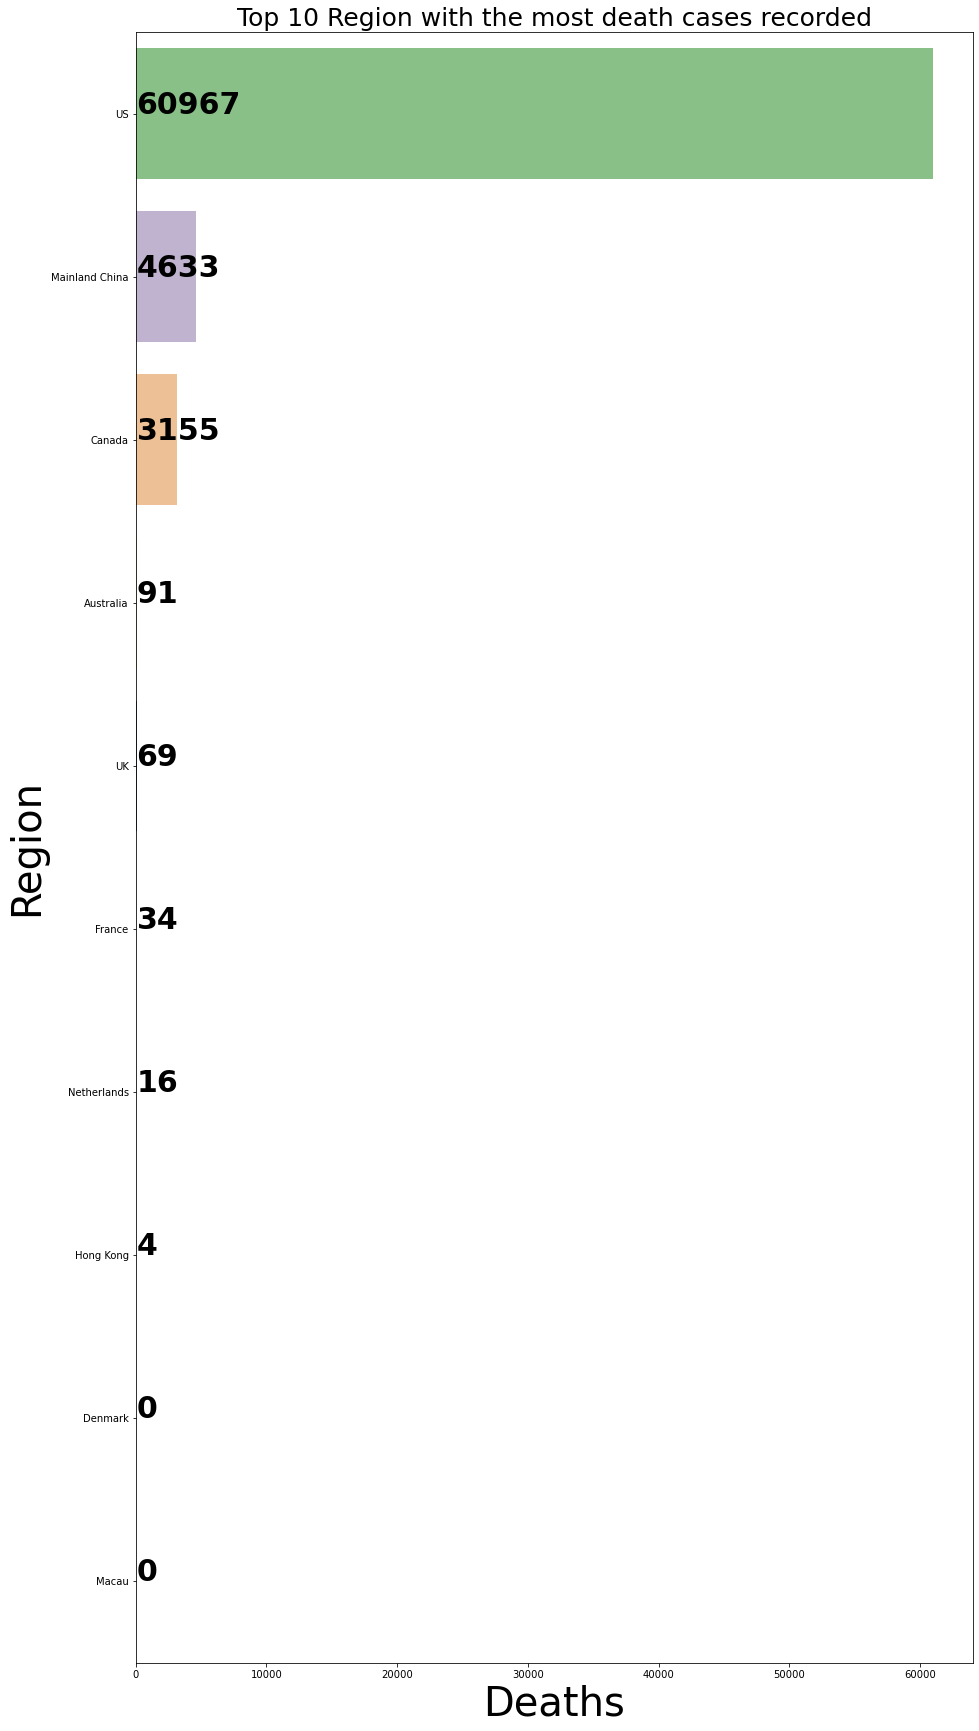

In [32]:
# visualising the top 10 region with the most death cases
mplt.figure(figsize=(15,30))
ax = sns.barplot(x = "Deaths",y = "Region", data = region, palette = "Accent", linewidth = 5, label = "big")
for i, j in enumerate(region["Deaths"]):
    ax.text(65, i, j, weight = "bold", color = "black", fontsize = 30, ha = "left")
mplt.title("Top 10 Region with the most death cases recorded",fontsize=25)
ax.set_xlabel(xlabel = 'Deaths', fontsize = 40)
ax.set_ylabel(ylabel = 'Region', fontsize = 40)
mplt.show()

**The Region with the most death cases recorded as of the Database is USA**

**4.**

In [33]:
## Top 10 regions with the highest recovery
covdata.groupby('Region')['Recovered'].sum().sort_values(ascending = False).head(10)

Region
US                120720
Mainland China     77610
Canada             20327
Australia           5715
France               890
UK                   857
Hong Kong            830
Denmark              192
Netherlands          119
Macau                 34
Name: Recovered, dtype: int64

In [34]:
# creating new list having the highest recovery recorded
topreco=[]
for region in covdata['Region'].unique():
    df=covdata[covdata['Region']==region]    #get the dataframe for each region
    sum=np.sum(df['Recovered'])         #total number of recovrey recorded
    topreco.append([region,sum])

region=pd.DataFrame(topreco,columns=['Region','Recovered'])  #converting the list to dataframe and sort
region.sort_values(by='Recovered',ascending=False,inplace=True)

In [35]:
region

,Region,Recovered
0,US,120720
3,Mainland China,77610
1,Canada,20327
5,Australia,5715
7,France,890
2,UK,857
8,Hong Kong,830
6,Denmark,192
4,Netherlands,119
9,Macau,34


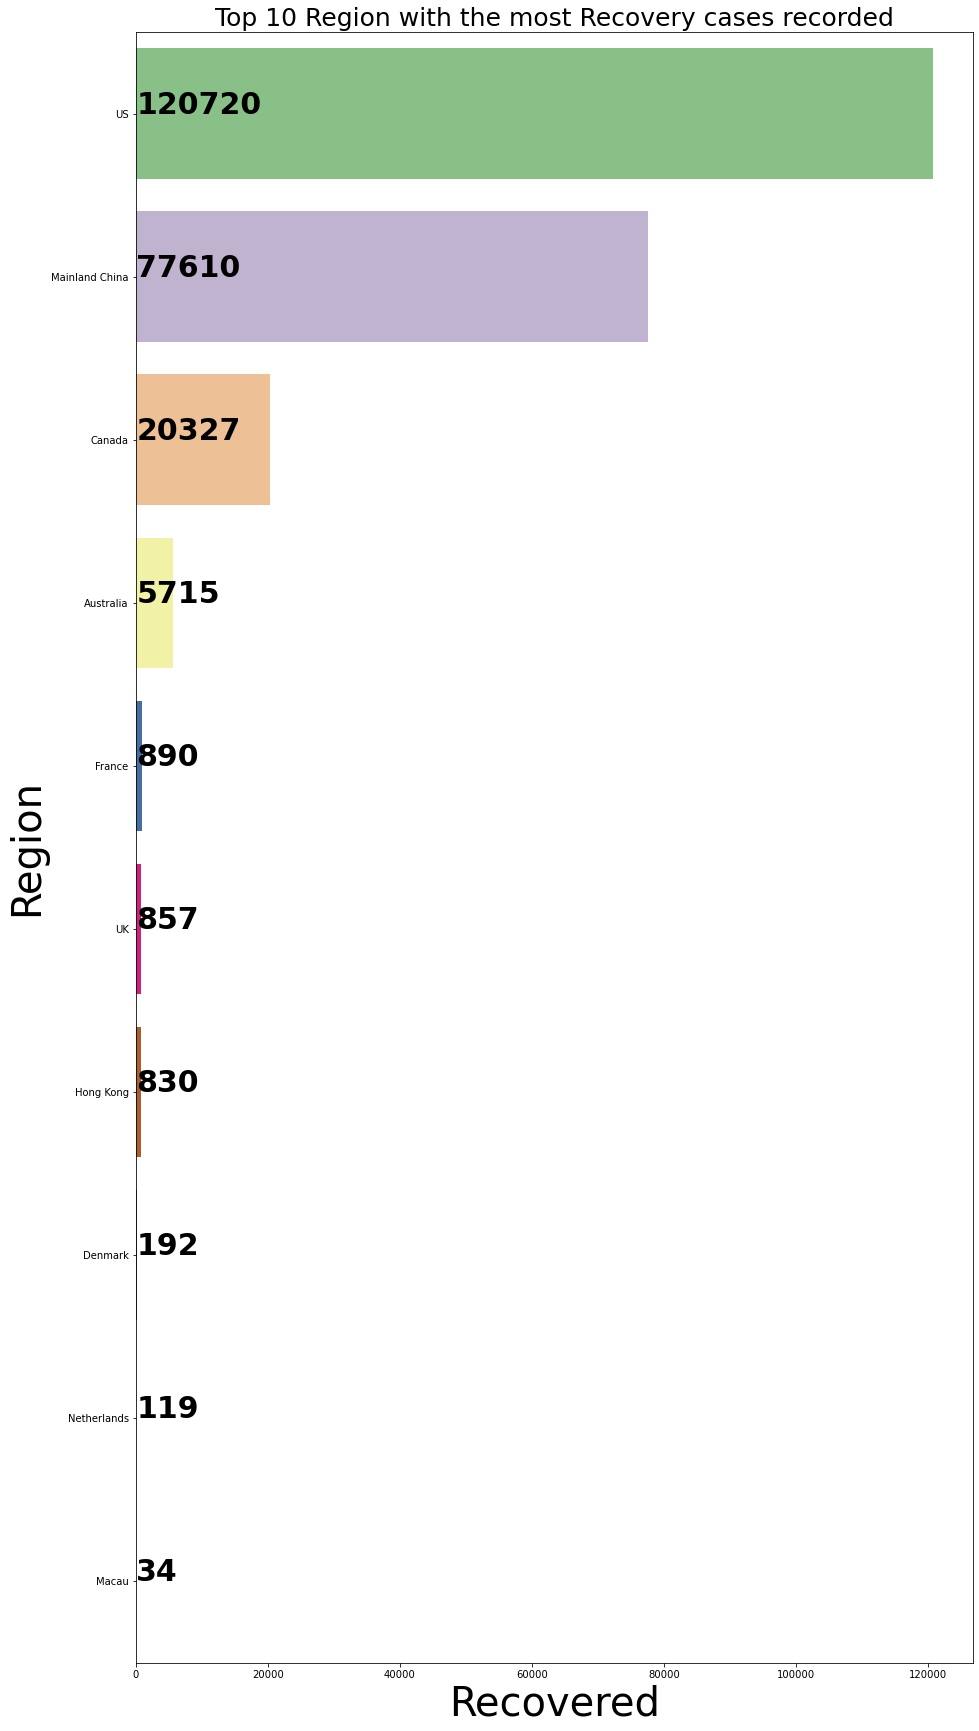

In [36]:
#visualising the top 10 region with the most recovery cases
mplt.figure(figsize=(15,30))
ax = sns.barplot(x = "Recovered",y = "Region", data = region, palette = "Accent", linewidth = 5, label = "big")
for i, j in enumerate(region["Recovered"]):
    ax.text(65, i, j, weight = "bold", color = "black", fontsize = 30, ha = "left")
mplt.title("Top 10 Region with the most Recovery cases recorded",fontsize=25)
ax.set_xlabel(xlabel = 'Recovered', fontsize = 40)
ax.set_ylabel(ylabel = 'Region', fontsize = 40)
mplt.show()

**The Region with the most recovery as of the Database is USA.**

**5.**

In [37]:
#reporting USA's status as on 29th april 2020
covdata[covdata.Region == 'US']

,Date,State,Region,Confirmed,Deaths,Recovered
181,4/29/2020,Alabama,US,6912,256,0
182,4/29/2020,Alaska,US,355,9,0
186,4/29/2020,Arizona,US,7209,308,0
187,4/29/2020,Arkansas,US,3193,57,0
195,4/29/2020,California,US,48747,1946,0
199,4/29/2020,Colorado,US,14758,766,0
200,4/29/2020,Connecticut,US,26767,2169,0
202,4/29/2020,Delaware,US,4655,144,0
204,4/29/2020,Diamond Princess cruise ship,US,49,0,0
205,4/29/2020,District of Columbia,US,4106,205,0


Text(0.5, 1.0, 'Distribution of Confirmed cases in Different States in USA')

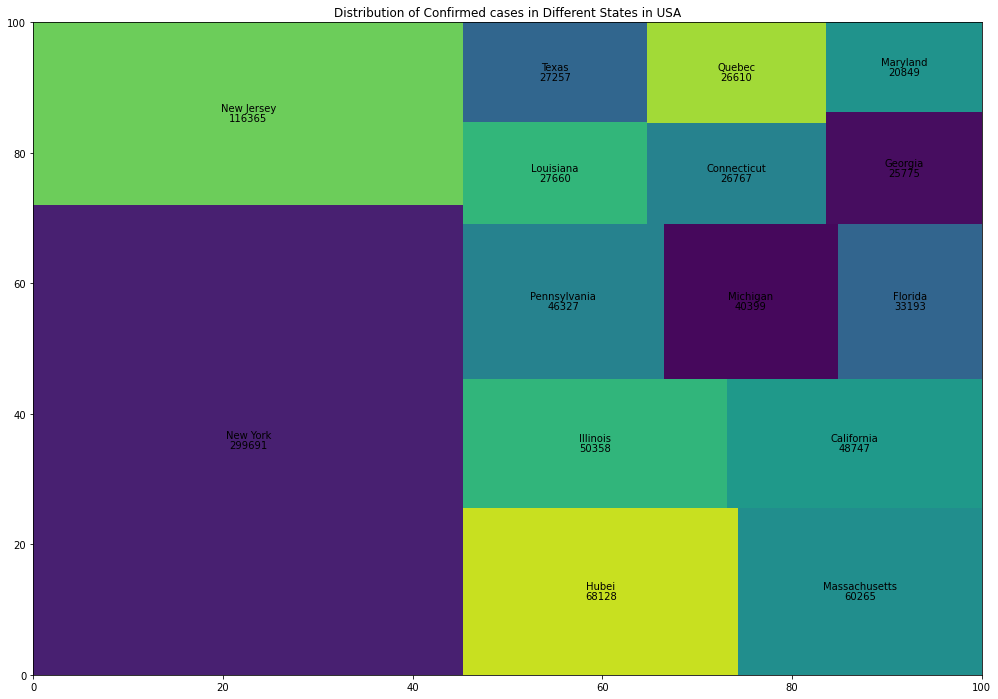

In [40]:
# plot the confirmed cases in different states of US
mplt.figure(figsize=(17,12))
mean_amount = covdata.groupby('State').sum()["Confirmed"].sort_values(ascending=False).head(15)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values)
mplt.title('Distribution of Confirmed cases in Different States in USA')

**New Jersy is the State with the most confirmed cases in USA**

**Summary**

    1. We have seen Total number of Confirmed, Death and Recovered cases from the dataset
    2. The country with the most confirmed Cases recorded is USA as on 29th April 2020
    3. The country with the most deaths recorded is USA as on 29th April 2020
    4. The country with the most recovery recorded is USA as on 29th April 2020
    5. New Jersy is the state with most confirmed cases in USA as on 29th April 2020


                                                                                      by Pushpak Umale
                                                                                      umaletanmay2000@gmail.com